 # Eman Amr Abd Elmonem
 
## The Sparks Foundation(Data Science & Business Analytics intern)

### Prediction Using Supervised ML (TASK 1)

**Step 1: Importing Libraries**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




**Step 2: Reading The Dataset**

In [121]:
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.shape

(25, 2)

**Step 3: Checking and visualizing  data**

In [122]:
dataset.head(10)



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [123]:
#Checking if there any null value in the Dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

*There is no null value in the Dataset*

In [124]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


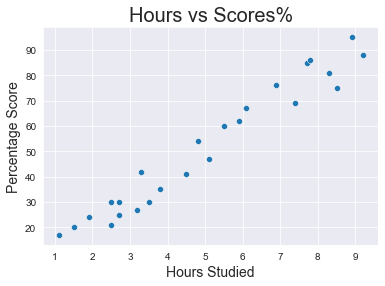

In [126]:
#visualizing data
sns.set_style('darkgrid')
sns.scatterplot(y= dataset['Scores'], x= dataset['Hours'])
plt.title('Hours vs Scores%',size=20)
plt.xlabel('Hours Studied',size=14)
plt.ylabel('Percentage Score',size=14)
plt.show()


*From the scatter graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*


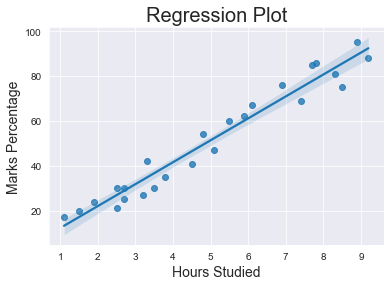

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [139]:
#plot a regression line to confirm the relation.
sns.regplot(x= dataset['Hours'], y= dataset['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()
print(dataset.corr())

**Step 4:Preparing the Data**

In [128]:
#Splitting the Data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step 5:Training the Algorithm**

In [130]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [131]:
print(regressor.intercept_)


2.0181600414346974


print(regressor.coef_)

**Step 6:Making Predictions**

In [132]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing the Predicted Score with the Actual Score**

In [133]:
df = pd.DataFrame({'Hours': X_test.reshape(1,-1)[0] ,'Actual Score': y_test, 'Predicted Score': y_pred})
df

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


**Visualizing the accuracy of the model**


In [134]:
df_sorted = df.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


**Visually Comparing the Predicted Score with the Actual Score**

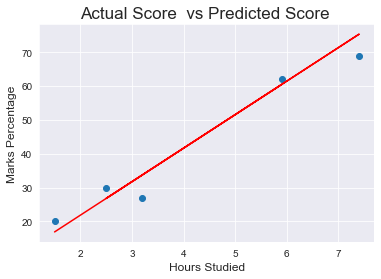

In [135]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Actual Score  vs Predicted Score ', size=17)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

c:\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


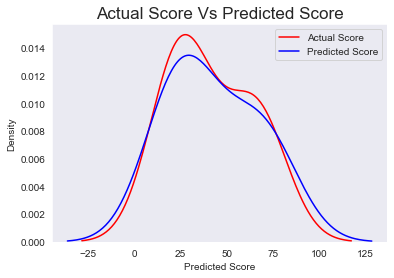

In [136]:
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title('Actual Score Vs Predicted Score',size=17)
plt.show()

**Step 7:Evaluating the Algorithm**


In [137]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [138]:
hrs = 9.25
pred = regressor.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is 93.69173248737535
